In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
data = pd.read_csv('dataset/mental_health_dataset.csv') # Gets data from model
print(data.head())

   User_ID  Age      Gender  Occupation    Country Mental_Health_Condition  \
0        1   36  Non-binary       Sales     Canada                      No   
1        2   34      Female   Education         UK                     Yes   
2        3   65  Non-binary       Sales        USA                     Yes   
3        4   34        Male       Other  Australia                      No   
4        5   22      Female  Healthcare     Canada                     Yes   

  Severity Consultation_History Stress_Level  Sleep_Hours  Work_Hours  \
0   Medium                  Yes       Medium          7.1          46   
1      NaN                   No          Low          7.5          47   
2     High                   No          Low          8.4          58   
3      Low                   No       Medium          9.8          30   
4      Low                   No       Medium          4.9          62   

   Physical_Activity_Hours  
0                        5  
1                        8  
2    

In [3]:
pd.get_dummies(data)

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Occupation_Education,...,Mental_Health_Condition_No,Mental_Health_Condition_Yes,Severity_High,Severity_Low,Severity_Medium,Consultation_History_No,Consultation_History_Yes,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium
0,1,36,7.1,46,5,False,False,True,False,False,...,True,False,False,False,True,False,True,False,False,True
1,2,34,7.5,47,8,True,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
2,3,65,8.4,58,10,False,False,True,False,False,...,False,True,True,False,False,True,False,False,True,False
3,4,34,9.8,30,2,False,True,False,False,False,...,True,False,False,True,False,True,False,False,False,True
4,5,22,4.9,62,5,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,9.3,50,0,False,False,True,False,False,...,True,False,False,False,False,False,True,False,True,False
996,997,31,4.5,37,6,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
997,998,33,9.7,73,10,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
998,999,42,6.5,79,8,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


In [4]:
# getting input for variables (eventually to be replaced by web-app
# usr_age = input('Enter your age: ')
# usr_gender = input('Enter your gender (M, F, NB, NA): ')
# usr_sleep = input('How many hours a night do you sleep? : ')
# usr_work = input('How many hours a week do you work? : ')
# usr_fitness = input('How many hours a week do you excercise? : ')
# usr_consult = input('Have you been consulted for a mental health condition in the past?: ')
# usr_stress = input('What is your stress level?: ')


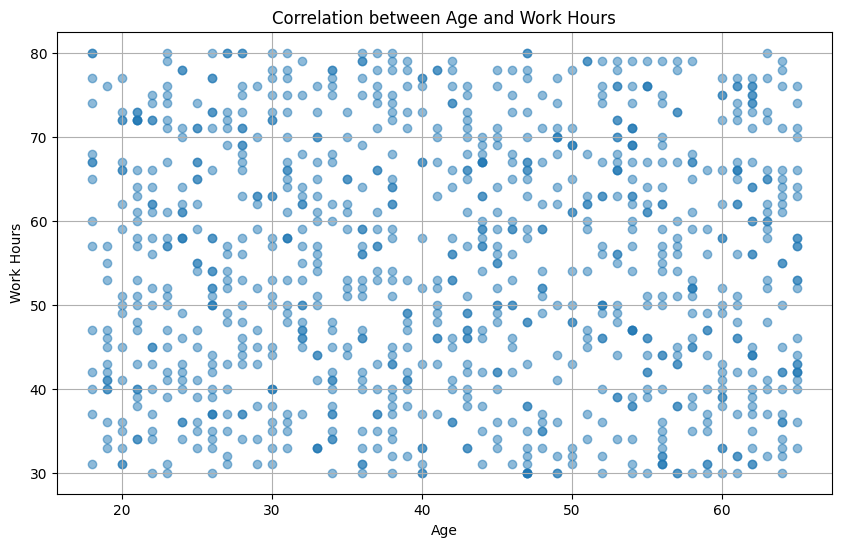

In [5]:
#correlation btwn age and hours worked
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Work_Hours'], alpha=0.5)
plt.title("Correlation between Age and Work Hours")
plt.xlabel("Age")
plt.ylabel("Work Hours")
plt.grid(True)
plt.show()

<BarContainer object of 1000 artists>

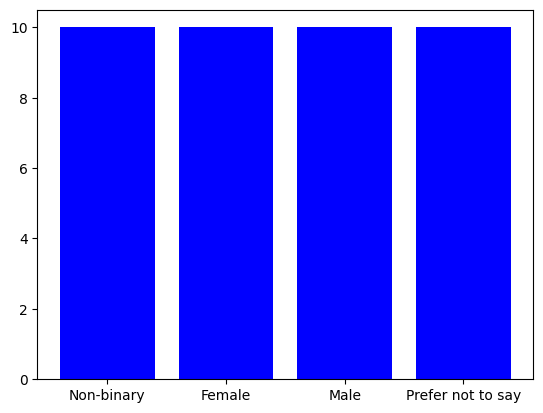

In [6]:
plt.bar(data['Gender'], data['Sleep_Hours'], color='blue')

In [7]:
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'Country', 'Severity', 'Consultation_History', 'Stress_Level']

In [8]:
# loop to convert values into numerical data that can be used by the model
for column in categorical_columns: 
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [9]:
# selects target data, which is mental health condition in this case (we are trying to predict it)
target_encoder = LabelEncoder()
data['Mental_Health_Condition'] = target_encoder.fit_transform(data['Mental_Health_Condition'])

In [10]:
# sets features and target
features = ['Age', 'Gender', 'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']
target = 'Mental_Health_Condition'

In [11]:
X = data[features] # conventional names to represent feats and target are X and y
y = data[target]

In [12]:
#for normalizing data (scales x so mean to 0 and SD to 1)
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [13]:
# splitting training and testing data 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)


In [14]:
# making tensors based off data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [15]:
print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([700, 6])
torch.Size([300, 6])
torch.Size([700])
torch.Size([300])


In [16]:
#MODEL CREATION
class MentalHealthModel(nn.Module):
    def __init__(self, input_size):
        super(MentalHealthModel, self).__init__()
        # 3 fully connected linear layers
        self.fc1 = nn.Linear(input_size, 32) # outputs 32 neurons from input_size
        self.fc2 = nn.Linear(32, 16) # condenses 32 to 16
        self.fc3 = nn.Linear(16, 16) # condenses 16 neurons down to 8
        self.fc4 = nn.Linear(16, 2) # takes in the 8 returned from fc2 and outputs bool value
        
    #FORWARD PASS

    def forward(self, x):
        x = torch.relu(self.fc1(x)) #NON-LINEAR LAYERS 
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc3(x)
        return x

In [17]:
input_size = X_train_tensor.shape[1] 
model = MentalHealthModel(input_size) # model initialized
criterion = nn.CrossEntropyLoss() # loss function initialized
optimizer = optim.Adam(model.parameters(), lr=0.001) # optimizer initialized


In [18]:
# training model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # fwd pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # calc loss; optimizer step
    loss.backward()
    optimizer.step()
    # print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 2.6360
Epoch [20/100], Loss: 2.5755
Epoch [30/100], Loss: 2.5025
Epoch [40/100], Loss: 2.4051
Epoch [50/100], Loss: 2.2681
Epoch [60/100], Loss: 2.0694
Epoch [70/100], Loss: 1.7924
Epoch [80/100], Loss: 1.4467
Epoch [90/100], Loss: 1.1137
Epoch [100/100], Loss: 0.8837


In [19]:
# model evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.33%
